In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train-data/train.csv
/kaggle/input/train-data/train_X.npy


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Activation, concatenate, GlobalAveragePooling2D
from keras.initializers import glorot_uniform

Using TensorFlow backend.


In [3]:
train_X = np.load("/kaggle/input/train-data/train_X.npy")

train_y = np.asarray(pd.read_csv("/kaggle/input/train-data/train.csv").iloc[:,1])

train_y = to_categorical(train_y)

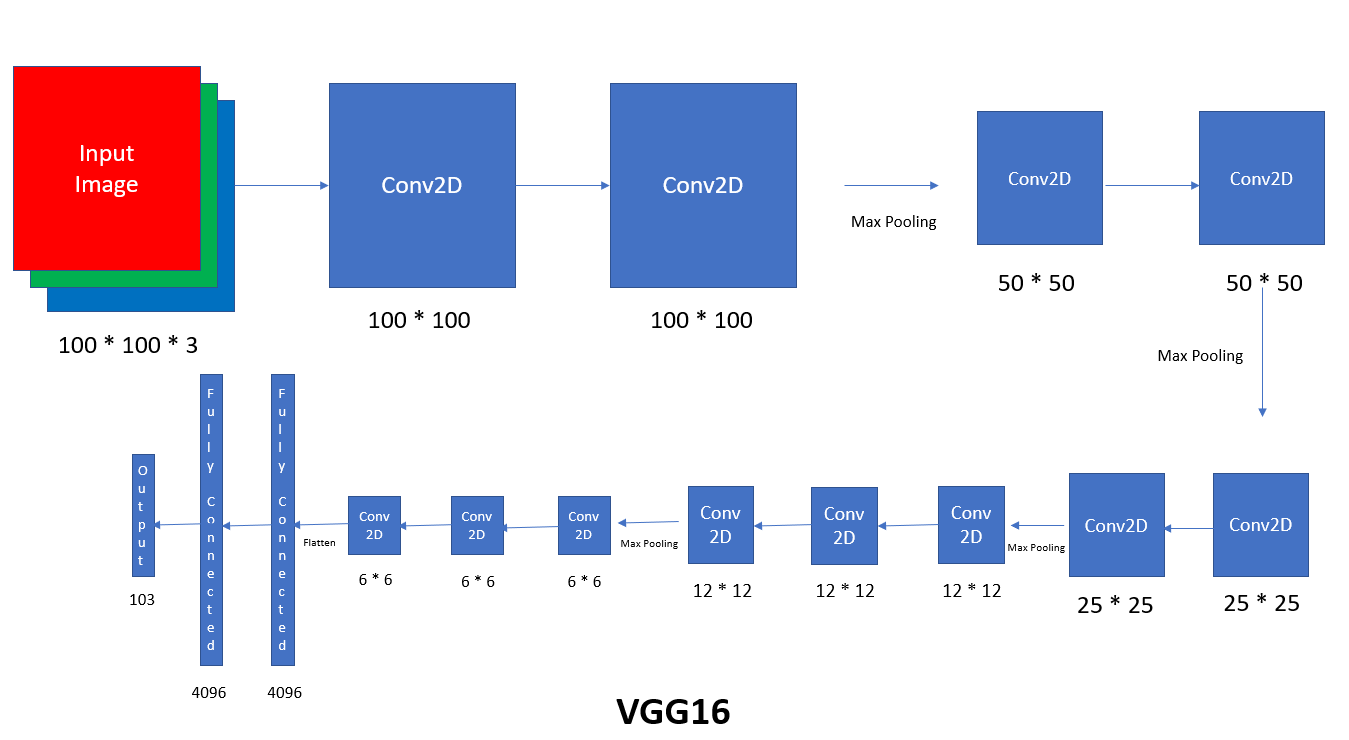

VGG16 Network

In [4]:
image = Input(shape=[100, 100, 3])

# Block1
X = Conv2D(64, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(image)
X = Conv2D(64, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)

# Block2
X = Conv2D(128, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(128, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)

# Block3
X = Conv2D(256, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(256, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)

# Block4
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)

# Block5
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = Conv2D(512, kernel_size=(3,3), kernel_initializer='glorot_uniform', padding='same', activation='relu')(X)
X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)

# Block6
X = Flatten()(X)
X = Dense(4096, activation='relu')(X)
X = Dense(4096, activation='relu')(X)
target = Dense(103, activation='softmax')(X)

model = Model(image, target, name='VGG16')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0     

In [5]:
model.fit(train_X, train_y, validation_split=0.2, epochs=100, batch_size=128)

Train on 14832 samples, validate on 3708 samples
Epoch 1/100
14832/14832 [==============================] - 30s 2ms/step - loss: 7.2710 - accuracy: 0.0299 - val_loss: 4.5020 - val_accuracy: 0.0297
Epoch 2/100
14832/14832 [==============================] - 25s 2ms/step - loss: 4.2502 - accuracy: 0.0452 - val_loss: 4.0528 - val_accuracy: 0.0601
Epoch 3/100
14832/14832 [==============================] - 25s 2ms/step - loss: 3.9745 - accuracy: 0.0679 - val_loss: 3.8400 - val_accuracy: 0.0925
Epoch 4/100
14832/14832 [==============================] - 25s 2ms/step - loss: 3.6660 - accuracy: 0.1102 - val_loss: 3.5840 - val_accuracy: 0.1208
Epoch 5/100
14832/14832 [==============================] - 25s 2ms/step - loss: 3.4144 - accuracy: 0.1439 - val_loss: 3.3734 - val_accuracy: 0.1508
Epoch 6/100
14832/14832 [==============================] - 25s 2ms/step - loss: 3.1376 - accuracy: 0.1899 - val_loss: 3.0196 - val_accuracy: 0.2179
Epoch 7/100
14832/14832 [==============================] - 25s 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'Epochs')

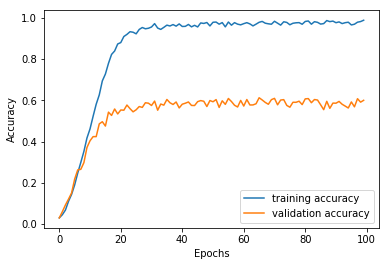

In [6]:
import matplotlib.pyplot as plt 
print(model.history.history.keys())
plt.figure(1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')